In [5]:
from __future__ import print_function
import tensorflow.keras as keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [11]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [7]:
num_classes = 10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

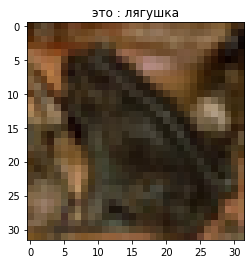

In [13]:
import matplotlib.pyplot as plt
import numpy as np


N = 30

plt.imshow(x_test[N][:,:,:])
plt.title('это : ' + classes[np.argmax(y_test[N,:])])
plt.show()

In [22]:
# макс кол-во шоков
epochs = 5
# разбер данных
batch_size = 128
data_augmentation = False

In [23]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/5
391/391 [==============================] - 183s 467ms/step - loss: 2.2723 - accuracy: 0.1350 - val_loss: 2.1800 - val_accuracy: 0.2488
Epoch 2/5
391/391 [==============================] - 183s 468ms/step - loss: 2.0933 - accuracy: 0.2275 - val_loss: 2.0017 - val_accuracy: 0.2780
Epoch 3/5
391/391 [==============================] - 183s 469ms/step - loss: 1.9997 - accuracy: 0.2698 - val_loss: 1.9260 - val_accuracy: 0.3175
Epoch 4/5
391/391 [==============================] - 183s 469ms/step - loss: 1.9409 - accuracy: 0.2946 - val_loss: 1.8350 - val_accuracy: 0.3533
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 1.7603 - accuracy: 0.3772
Test loss: 1.760313868522644
Test accuracy: 0.37720000743865967


In [24]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/5
391/391 [==============================] - 192s 489ms/step - loss: 2.3017 - accuracy: 0.1076 - val_loss: 2.2958 - val_accuracy: 0.1241
Epoch 2/5
391/391 [==============================] - 191s 489ms/step - loss: 2.2668 - accuracy: 0.1389 - val_loss: 2.1895 - val_accuracy: 0.2155
Epoch 3/5
391/391 [==============================] - 192s 490ms/step - loss: 2.1482 - accuracy: 0.1958 - val_loss: 2.0609 - val_accuracy: 0.2393
Epoch 4/5
391/391 [==============================] - 191s 489ms/step - loss: 2.0767 - accuracy: 0.2175 - val_loss: 2.0335 - val_accuracy: 0.2490
Epoch 5/5
313/313 [==============================] - 9s 27ms/step - loss: 2.0125 - accuracy: 0.2674
Test loss: 2.012544631958008
Test accuracy: 0.26739999651908875


In [27]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (6, 6), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (6, 6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (6, 6), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (6, 6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/5
391/391 [==============================] - 428s 1s/step - loss: 2.3022 - accuracy: 0.1070 - val_loss: 2.3002 - val_accuracy: 0.1774
Epoch 2/5
391/391 [==============================] - 425s 1s/step - loss: 2.2952 - accuracy: 0.1328 - val_loss: 2.2733 - val_accuracy: 0.1639
Epoch 3/5
391/391 [==============================] - 430s 1s/step - loss: 2.1887 - accuracy: 0.1671 - val_loss: 2.1123 - val_accuracy: 0.1943
Epoch 4/5
391/391 [==============================] - 428s 1s/step - loss: 2.1041 - accuracy: 0.1904 - val_loss: 2.0246 - val_accuracy: 0.2375
Epoch 5/5
313/313 [==============================] - 17s 54ms/step - loss: 1.9817 - accuracy: 0.2548
Test loss: 1.9816714525222778
Test accuracy: 0.2547999918460846


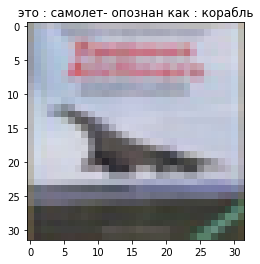

In [30]:
N = 3
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        3488      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 27, 27, 32)        36896     
_________________________________________________________________
activation_37 (Activation)   (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 64)       

In [33]:
x_train[0].shape

(32, 32, 3)

In [34]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/5
391/391 [==============================] - 464s 1s/step - loss: 2.2735 - accuracy: 0.1395 - val_loss: 2.1504 - val_accuracy: 0.2504
Epoch 2/5
391/391 [==============================] - 463s 1s/step - loss: 2.0650 - accuracy: 0.2350 - val_loss: 1.9518 - val_accuracy: 0.2992
Epoch 3/5
391/391 [==============================] - 461s 1s/step - loss: 1.9600 - accuracy: 0.2826 - val_loss: 1.9472 - val_accuracy: 0.3139
Epoch 4/5
391/391 [==============================] - 460s 1s/step - loss: 1.8584 - accuracy: 0.3302 - val_loss: 1.8305 - val_accuracy: 0.3495
Epoch 5/5
313/313 [==============================] - 21s 66ms/step - loss: 1.6695 - accuracy: 0.4081
Test loss: 1.669451355934143
Test accuracy: 0.4081000089645386


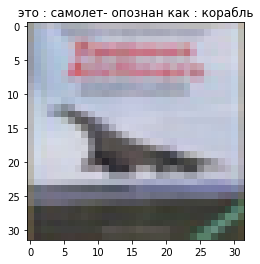

In [35]:
N = 3
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_45 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 128)      

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Concatenate

from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential, Model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


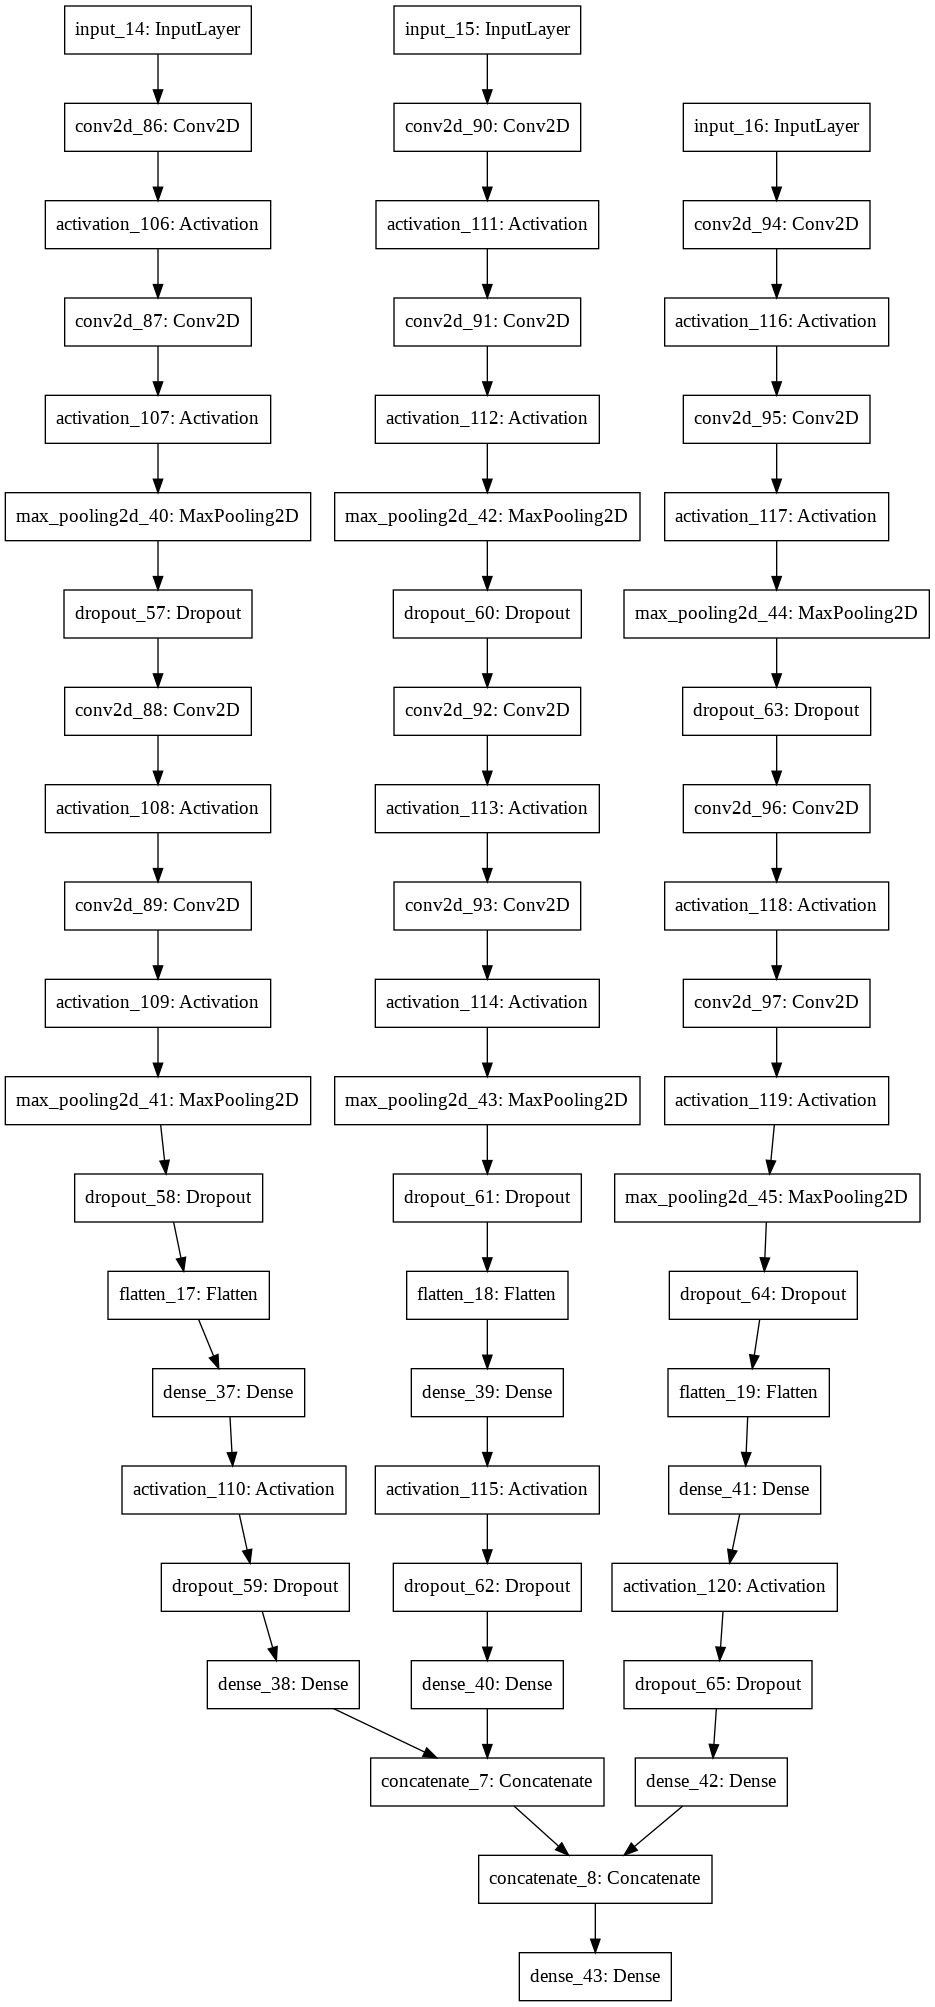

In [48]:
first_input = Input(shape=(32,32,3 ))
x11= Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(first_input)
x11= Activation('relu')(x11)
x11= Conv2D(64, (3, 3))(x11)
x11= Activation('relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout( 0.25)(x11)

x11= Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(x11)
x11= Activation('relu')(x11)
x11= Conv2D(128, (3, 3))(x11)
x11= Activation('relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout( 0.25)(x11)

x11= Flatten()(x11)
x11= Dense(512)(x11)
x11= Activation('relu')(x11)
x11= Dropout(0.5)(x11)

first_dense = Dense(num_classes)(x11)





second_input = Input(shape=(32,32,3 ))
x22= Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(second_input)
x22= Activation('relu')(x22)
x22= Conv2D(32, (3, 3))(x22)
x22= Activation('relu')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout( 0.25)(x22)

x22= Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(x22)
x22= Activation('relu')(x22)
x22= Conv2D(64, (3, 3))(x22)
x22= Activation('relu')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout( 0.25)(x22)

x22= Flatten()(x22)
x22= Dense(512)(x22)
x22= Activation('relu')(x22)
x22= Dropout(0.5)(x22)


second_dense = Dense(num_classes)(x22)

merge_one = Concatenate( )([first_dense, second_dense])



third_input = Input(shape=(32,32,3 ))
x33= Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(third_input)
x33= Activation('relu')(x33)
x33= Conv2D(32, (3, 3))(x33)
x33= Activation('relu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout( 0.25)(x33)

x33= Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(x33)
x33= Activation('relu')(x33)
x33= Conv2D(64, (3, 3))(x33)
x33= Activation('relu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout( 0.25)(x33)

x33= Flatten()(x33)
x33= Dense(512)(x33)
x33= Activation('relu')(x33)
x33= Dropout(0.5)(x33)
x33 = Dense(num_classes)(x33)



merge_two = Concatenate(axis=1)([merge_one, x33])
merge_two=Dense(10, activation='softmax')(merge_two)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')




In [ ]:
hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 702s 561ms/step - loss: 2.3051 - accuracy: 0.1081 - val_loss: 2.3014 - val_accuracy: 0.1014
Epoch 2/5
1250/1250 [==============================] - 702s 561ms/step - loss: 2.3043 - accuracy: 0.1024 - val_loss: 2.2991 - val_accuracy: 0.1365
Epoch 3/5
1182/1250 [===========================>..] - ETA: 36s - loss: 1.9945 - accuracy: 0.2563